<a href="https://colab.research.google.com/github/Rabia-Akhtr/Data-Science-Project-Breast_Cancer_Classification_ML/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:   Evaluating the Performance of Different Machine Learning Models for Breast Cancer Diagnosis**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

# **Import Libraries**
Load the required libraries for data manipulation, preprocessing, visualization and modeling.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# **Load and Explore the Dataset**
We will use the Breast Cancer Dataset (UCI Machine Learning Repository).

**Dataset Overview**

The dataset contains features computed from digitized images of fine needle aspirate (FNA) tests on breast masses.

**Key Features:**
Attributes like clump thickness, uniformity of cell size/shape, mitoses, etc.

**Dataset size:** 699 samples, with some missing values in the attribute "Bare Nuclei."

**Columns:**
Sample code number (ID, not useful)

Clump Thickness, Uniformity of Cell Size, ..., Bland Chromatin, etc. (features)

**Target Variable:**
Class (2 = benign, 4 = malignant).

In [3]:
def load_and_preprocess_data(url):
    """
    Loads and lightly cleans the Breast Cancer Wisconsin dataset.

    Steps:
    - Assigns proper column names
    - Replaces '?' with NaN
    - Converts 'Bare_Nuclei' to numeric
    - Drops 'ID' column
    - Displays summary info for EDA preparation

    Parameters:
        url (str): URL of the dataset

    Returns:
        pd.DataFrame: Cleaned dataset ready for EDA
    """
    # Column names from UCI repository
    column_names = [
        'ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
        'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
        'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
    ]

    # Load the dataset
    data = pd.read_csv(url, names=column_names, header=None)
    display(data)

    # Replace '?' with NaN in the entire DataFrame before converting to numeric ***
    data.replace('?', np.nan, inplace=True)

    # Convert 'Bare_Nuclei' to numeric (now possible due to '?'=>NaN)
    data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')

    # Drop the 'ID' column (not useful for prediction)
    data.drop(columns='ID', inplace=True)

    # Check for missing values and data types
    print("\nDataset Info:")
    print(data.info())

    return data

# URL of the dataset (UCI Breast Cancer Wisconsin Dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# Call the function
data = load_and_preprocess_data(url)


,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


**Total 11 feature is present in the dataset including target variable i.e Class**

In [4]:
# Number of rows to peek
n = 5

# Display the first n rows
print(f"First {n} rows:")
print(data.head(n), "\n")

# Display the last n rows
print(f"Last {n} rows:")
print(data.tail(n), "\n")

# Display the shape of the DataFrame
rows, cols = data.shape
print(f"Shape: {rows} rows, {cols} columns")

First 5 rows:
   Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0                5                     1                      1   
1                5                     4                      4   
2                3                     1                      1   
3                6                     8                      8   
4                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2                3      

### **Missing‑value check**

In [5]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Clump_Thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [6]:
data.describe()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# **Exploratory Data Analysis (EDA)**

## **Visualize Class Distribution**
This step visualizes the class distribution (Benign vs Malignant) to ensure the dataset is balanced.


Class Distribution:
Class
2    458
4    241
Name: count, dtype: int64


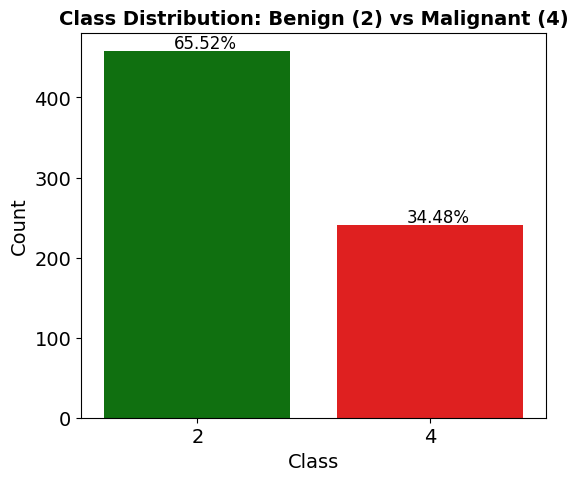

In [7]:
def visualize_class_distribution(data, target_column):
    """
    Visualize the class distribution for the target variable.
    """
    print("\nClass Distribution:")
    print(data[target_column].value_counts())

    colors = {2: "green", 4: "red"}

    # Create count plot
    plt.figure(figsize=(6, 5))

    ax = sns.countplot(x=target_column, hue=target_column, data=data, palette=colors, legend=False)

    # Add percentages on bars
    total = len(data)
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / total:.2f}%"
        ax.annotate(percentage, (p.get_x() + 0.3, p.get_height() + 3), fontsize=12)

    # Titles and labels
    plt.title("Class Distribution: Benign (2) vs Malignant (4)", fontsize=14, fontweight="bold") #Update title to reflect class values
    plt.xlabel("Class", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Show plot
    plt.show()

# Call function
visualize_class_distribution(data, 'Class')

## **Pie Plot**

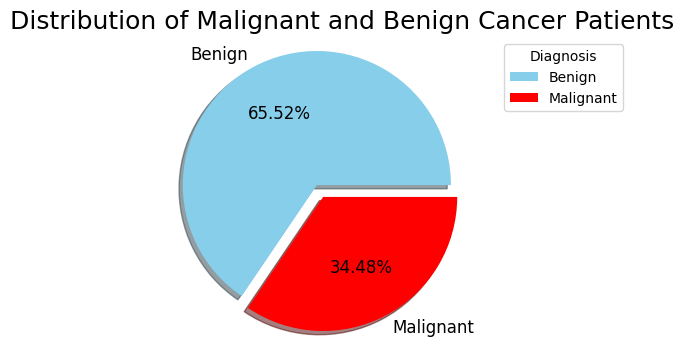

In [8]:
import matplotlib.pyplot as plt

# Optional: map class to binary if not already done
# data['Class'] = data['Class'].map({2: 0, 4: 1})

# Set labels and color palette
custom_palette = ["skyblue", "red"]  # Orange = Benign, Blue = Malignant
labels = ["Benign", "Malignant"]
explode = (0.1, 0)  # Explode the 'Benign' slice for visual emphasis

# Count class distribution
class_counts = data['Class'].value_counts().sort_index()  # Ensure 0=Benign, 1=Malignant

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.pie(class_counts,
       labels=labels,
       explode=explode,
       autopct='%1.2f%%',
       shadow=True,
       colors=custom_palette,
       textprops=dict(color="black", size=12))

# Draw circle for perfect shape
ax.axis('equal')

# Title and legend
plt.title('Distribution of Malignant and Benign Cancer Patients',
          fontsize=18, color='black', loc='left')
plt.legend(title='Diagnosis', loc='upper right')

# Show the chart
plt.show()


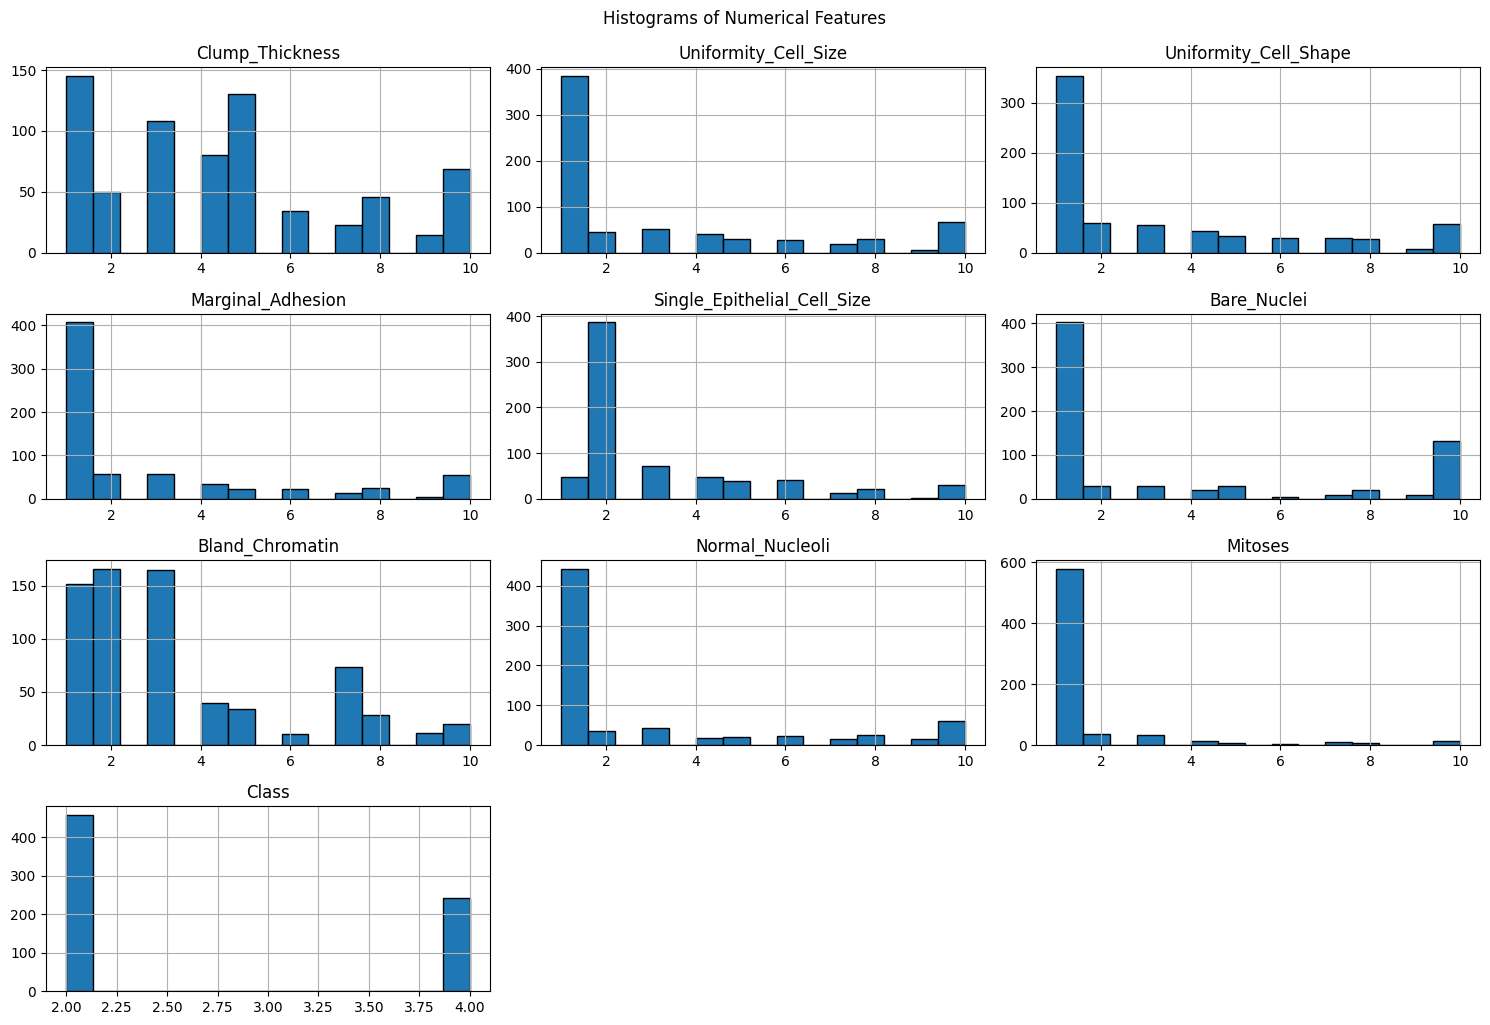

In [9]:
import matplotlib.pyplot as plt

def plot_feature_histograms(data):
    """
    Plots histograms for all numerical features in the dataset.

    Parameters:
        data (pd.DataFrame): The dataset containing numerical features.

    Returns:
        None
    """
    num_features = data.select_dtypes(include=[np.number]).columns.tolist()
    data[num_features].hist(
        bins=15,
        figsize=(15, 10),
        layout=(4, 3),
        edgecolor='black'
    )
    plt.tight_layout()
    plt.suptitle("Histograms of Numerical Features", y=1.02)
    plt.show()
plot_feature_histograms(data)

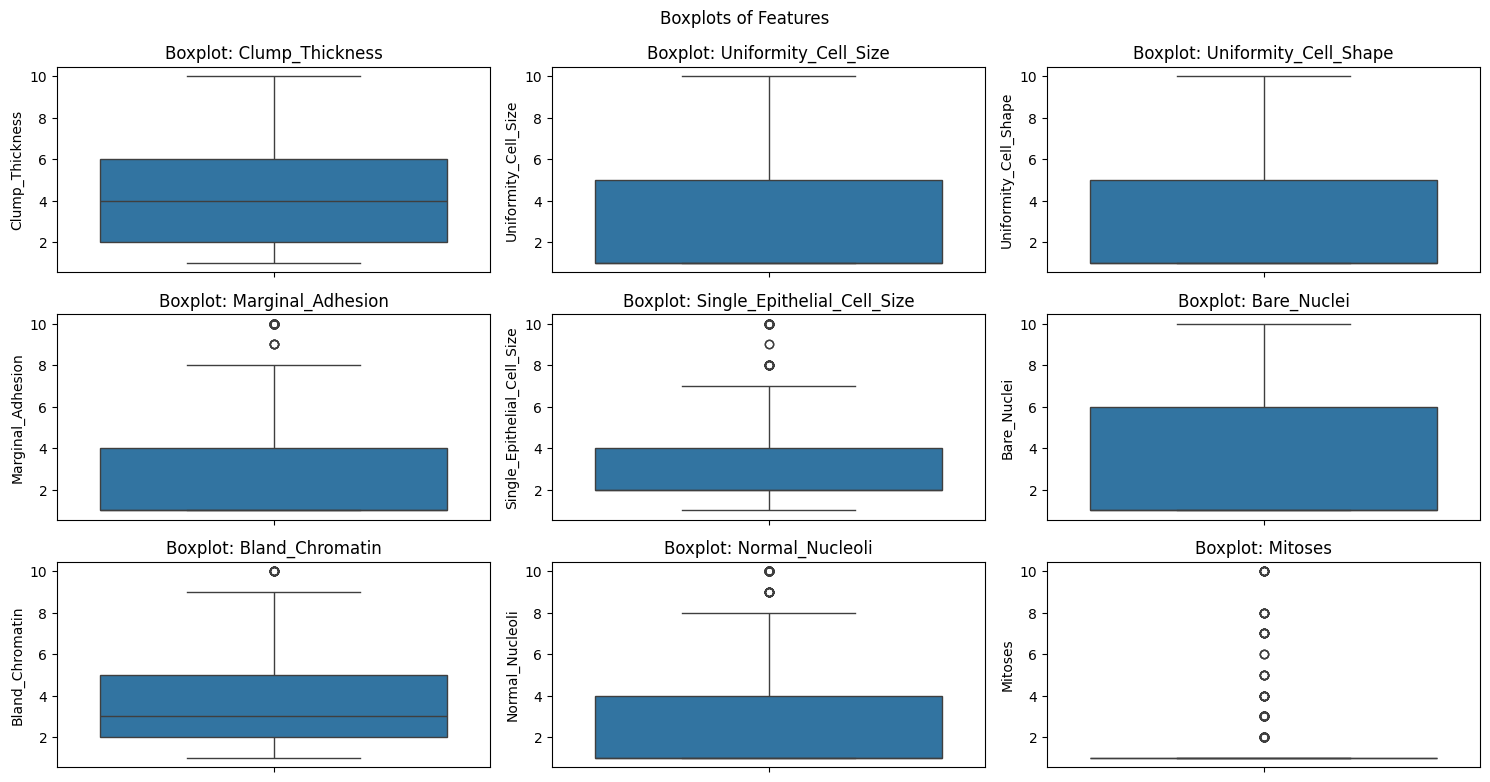

In [10]:
def plot_feature_boxplots(data):
    """
    Plots boxplots for all numerical features to detect outliers.

    Parameters:
        data (pd.DataFrame): The dataset containing numerical features.

    Returns:
        None
    """
    num_features = data.select_dtypes(include=[np.number]).columns.tolist()
    num_features.remove('Class')  # Exclude target variable

    plt.figure(figsize=(15, 10))
    for i, column in enumerate(num_features, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(y=data[column])
        plt.title(f'Boxplot: {column}')
    plt.tight_layout()
    plt.suptitle("Boxplots of Features", y=1.02)
    plt.show()
plot_feature_boxplots(data)

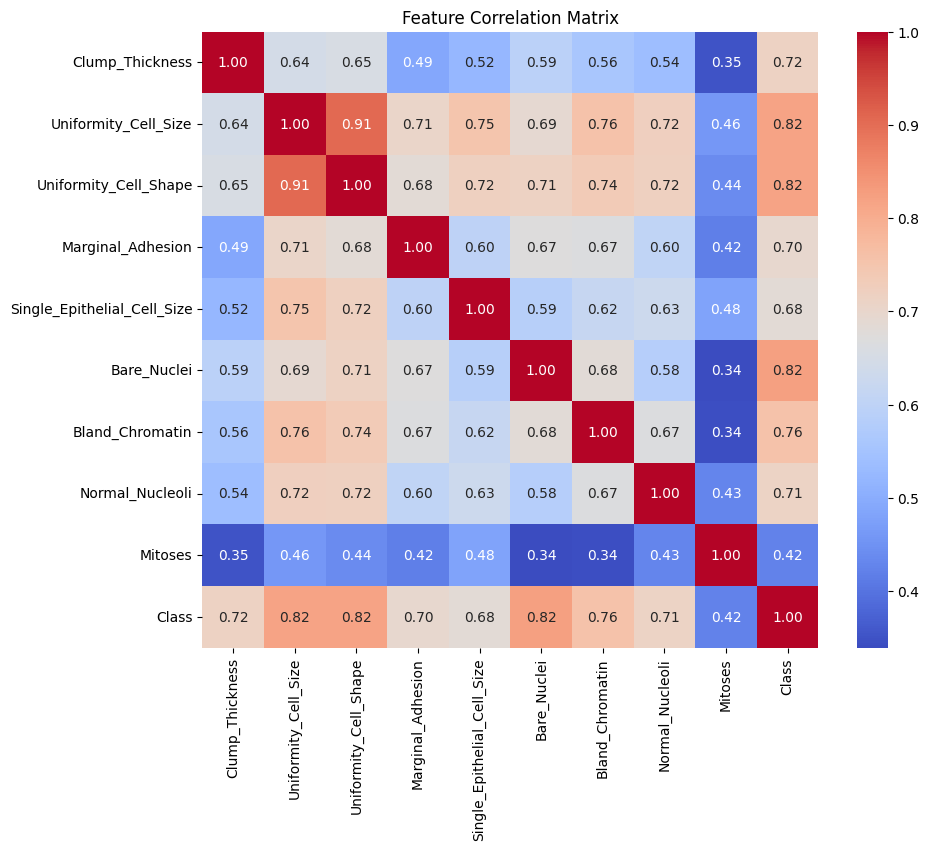

In [11]:
def plot_correlation_heatmap(data):
    """
    Plots a heatmap of the correlation matrix for numerical features.

    Parameters:
        data (pd.DataFrame): The dataset containing numerical features.

    Returns:
        None
    """
    # Select only numerical features for correlation calculation
    numerical_data = data.select_dtypes(include=[np.number])

    corr = numerical_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Feature Correlation Matrix")
    plt.show()
plot_correlation_heatmap(data)

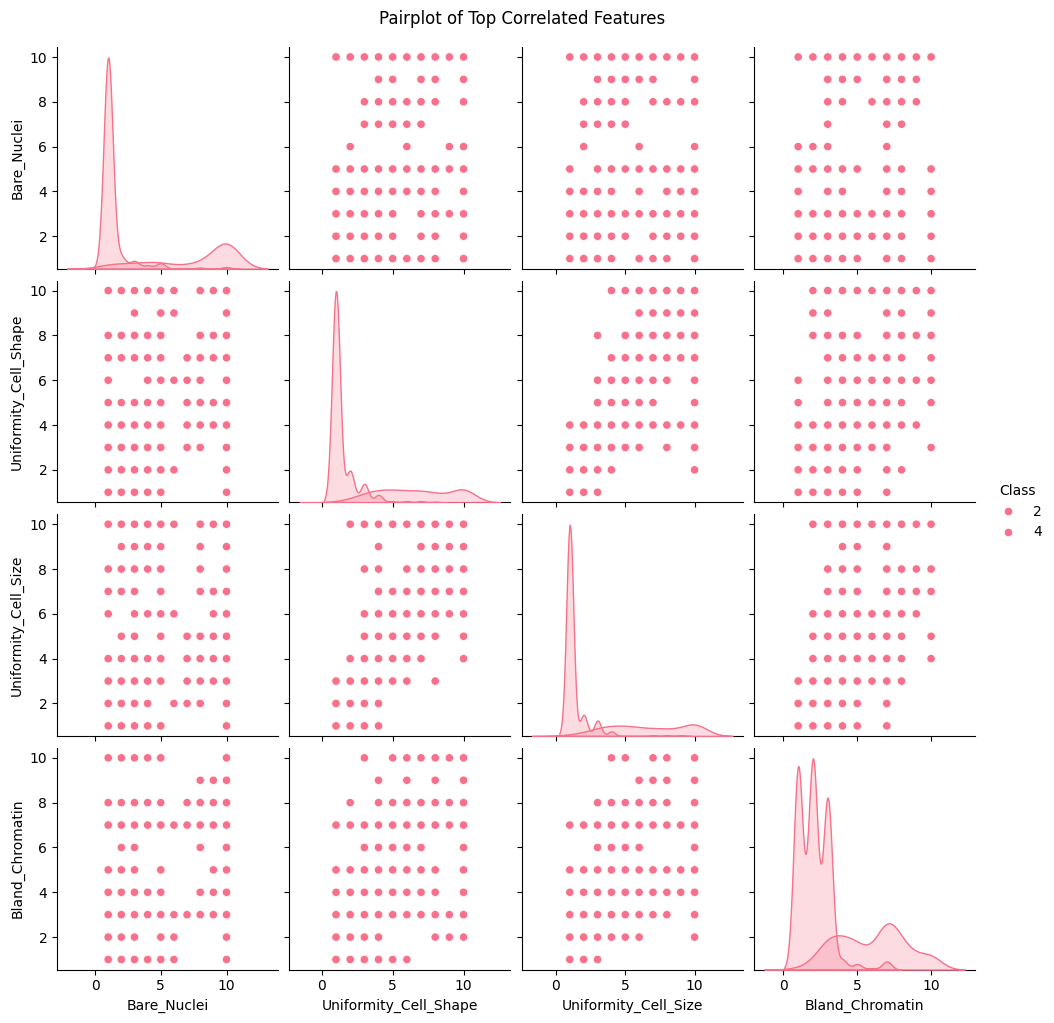

In [12]:
def plot_top_correlated_pairplot(data, target='Class', top_n=4):
    """
    Plots a seaborn pairplot for the top N features most correlated with the target.

    Parameters:
        data (pd.DataFrame): The dataset.
        target (str): Target column name.
        top_n (int): Number of top correlated features to plot.

    Returns:
        None
    """
    data = data.dropna()  # Drop NA for pairplot compatibility
    corr = data.corr()[target].abs().sort_values(ascending=False)
    top_features = corr.index[1:top_n+1].tolist()  # exclude the target itself

    sns.pairplot(data[top_features + [target]], hue=target, palette='husl')
    plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
    plt.show()
plot_top_correlated_pairplot(data)

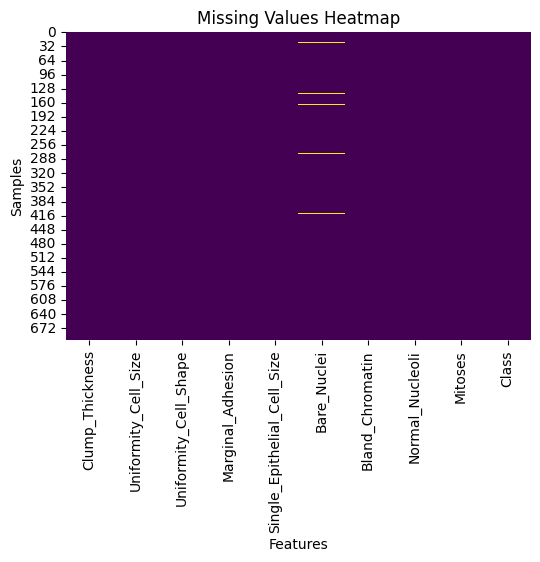

In [13]:
def plot_missing_values_heatmap(data):
    """
    Displays a heatmap of missing values in the dataset.

    Parameters:
        data (pd.DataFrame): The dataset.

    Returns:
        None
    """
    plt.figure(figsize=(6, 4))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.xlabel("Features")
    plt.ylabel("Samples")
    plt.show()

plot_missing_values_heatmap(data)


In [14]:
def detect_outliers_iqr(data):
    """
    Detects outliers in each numerical feature using the IQR method.

    Parameters:
        data (pd.DataFrame): The dataset.

    Returns:
        dict: A dictionary with feature names and their respective outlier counts.
    """
    outlier_summary = {}
    num_features = data.select_dtypes(include=[np.number]).columns.tolist()
    num_features.remove('Class')  # Exclude target

    for col in num_features:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
        outlier_summary[col] = outliers

    print("Outliers per feature (IQR method):")
    for feature, count in outlier_summary.items():
        print(f"{feature}: {count}")
    return outlier_summary
outlier_summary = detect_outliers_iqr(data)

Outliers per feature (IQR method):
Clump_Thickness: 0
Uniformity_Cell_Size: 0
Uniformity_Cell_Shape: 0
Marginal_Adhesion: 60
Single_Epithelial_Cell_Size: 54
Bare_Nuclei: 0
Bland_Chromatin: 20
Normal_Nucleoli: 77
Mitoses: 120


### **Data Preprocessing**
Preprocessing ensures data is clean and ready for modeling. Steps include:
1. Dropping unnecessary columns (e.g., 'ID').
2. Handling missing values in the 'Bare_Nuclei' column using median imputation.
3. Encoding the target variable ('Class') as binary (0 = benign, 1 = malignant).
4. Scaling features to standardize input.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess_data(data, verbose=True):
    """
    Preprocess the Breast Cancer Wisconsin dataset:
    - Drops 'ID' column if present
    - Converts 'Bare_Nuclei' to numeric and imputes missing values with median
    - Converts 'Class' to binary (2 -> 0, 4 -> 1)
    - Splits dataset into training and testing sets (stratified)
    - Normalizes features using StandardScaler

    Args:
        data (pd.DataFrame): Raw dataset
        verbose (bool): Whether to print debug info

    Returns:
        X_train_scaled, X_test_scaled, y_train, y_test, scaler
    """

    # Drop 'ID' column if it exists
    if 'ID' in data.columns:
        data = data.drop(columns=['ID'])

    # Handle missing values in 'Bare_Nuclei'
    data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'].replace('?', np.nan), errors='coerce')
    data['Bare_Nuclei'] = data['Bare_Nuclei'].fillna(data['Bare_Nuclei'].median())

    # Convert 'Class' to binary (0 = benign, 1 = malignant)
    data['Class'] = data['Class'].replace({2: 0, 4: 1})

    # Split features and labels
    X = data.drop(columns=['Class'])
    y = data['Class']

   # Stratified split: 70% train, 15% validation, 15% test
    X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

    X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    # Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #Add  the lines below to scale the validation data
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Verbose output
    if verbose:
        print("\nMissing values after handling:")
        print(data.isnull().sum())
        print("\nTraining Data Shape:", X_train.shape)
        print("Testing Data Shape:", X_test.shape)
        print("\nPreview of Scaled Features (Training Data):")
        print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

    return X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val, scaler

# Preprocess the dataset
X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val, scaler = preprocess_data(data)



Missing values after handling:
Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Training Data Shape: (489, 9)
Testing Data Shape: (105, 9)

Preview of Scaled Features (Training Data):
   Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0        -1.207481             -0.689055              -0.742347   
1         0.558243              2.232460               2.274337   
2        -0.501191             -0.364443              -0.407160   
3         0.205098             -0.039830               0.598402   
4        -0.854336             -0.689055              -0.742347   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0          -0.620899                    -0.548784  

In [16]:
# Display preprocessing summary
print("\n\033[1mPreprocessing Summary\033[0m")  # Bold Text
print("====================================")
print("✔ Target variable encoded (4 → 1, 2 → 0).")
print("✔ Data split into training (80%) and test (20%) sets.")
print("✔ Data normalized using StandardScaler.")
print("------------------------------------")
print(f"Training Data Shape: {X_train_scaled.shape}")
print(f"Test Data Shape: {X_test_scaled.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Target Shape: {y_test.shape}")
print("------------------------------------")

# Training Data Class Distribution
train_counts = y_train.value_counts()
train_percentages = y_train.value_counts(normalize=True) * 100

print("\n\033[1mClass Distribution in Training Data:\033[0m")
for label, count in train_counts.items():
    print(f"Class {label}: {count} samples ({train_percentages[label]:.2f}%)")

# Test Data Class Distribution
test_counts = y_test.value_counts()
test_percentages = y_test.value_counts(normalize=True) * 100

print("\n\033[1mClass Distribution in Test Data:\033[0m")
for label, count in test_counts.items():
    print(f"Class {label}: {count} samples ({test_percentages[label]:.2f}%)")
print("====================================")



Preprocessing Summary
✔ Target variable encoded (4 → 1, 2 → 0).
✔ Data split into training (80%) and test (20%) sets.
✔ Data normalized using StandardScaler.
------------------------------------
Training Data Shape: (489, 9)
Test Data Shape: (105, 9)
Training Target Shape: (489,)
Test Target Shape: (105,)
------------------------------------

Class Distribution in Training Data:
Class 0: 320 samples (65.44%)
Class 1: 169 samples (34.56%)

Class Distribution in Test Data:
Class 0: 69 samples (65.71%)
Class 1: 36 samples (34.29%)


In [17]:
def major_statistics(data):
    """
    Function to compute major statistics including mean, median, standard deviation,
    skewness, and kurtosis for the given dataset.

    Parameters:
        data (pd.DataFrame): The input dataset.

    Returns:
        pd.DataFrame: A DataFrame containing the computed statistics.
    """

    # Compute statistics
    stats = pd.DataFrame({
        "Mean": data.mean(numeric_only=True),
        "Median": data.median(numeric_only=True),
        "Standard Deviation": data.std(numeric_only=True),
        "Skewness": data.skew(numeric_only=True),
        "Kurtosis": data.kurt(numeric_only=True)
    })

    # Print statistics
    print("\n\033[1mSummary Statistics:\033[0m")

    return stats

# Call the function
major_statistics(data)



Summary Statistics:


,Mean,Median,Standard Deviation,Skewness,Kurtosis
Clump_Thickness,4.417740,4.0,2.815741,0.592859,-0.623715
Uniformity_Cell_Size,3.134478,1.0,3.051459,1.233137,0.098803
Uniformity_Cell_Shape,3.207439,1.0,2.971913,1.161859,0.007011
Marginal_Adhesion,2.806867,1.0,2.855379,1.524468,0.987947
Single_Epithelial_Cell_Size,3.216023,2.0,2.214300,1.712172,2.169066
Bare_Nuclei,3.486409,1.0,3.621929,1.025347,-0.726467
Bland_Chromatin,3.437768,3.0,2.438364,1.099969,0.184621
Normal_Nucleoli,2.866953,1.0,3.053634,1.422261,0.474269
Mitoses,1.589413,1.0,1.715078,3.560658,12.657878
Class,0.344778,0.0,0.475636,0.654564,-1.576064


In [18]:
data.describe() #descriptive statistics

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [19]:
def optimize_ann(X_train, y_train, X_val, y_val):
    """
    Optimize ANN hyperparameters using a validation set.

    Args:
        X_train, y_train: Training data and labels
        X_val, y_val: Validation data and labels

    Returns:
        best_params: Dictionary of best hyperparameters
    """
    # Parameters to optimize
    hidden_layer_sizes = [(32,), (64,), (128,), (64, 32), (128, 64)]
    dropout_rates = [0.2, 0.3, 0.4, 0.5]
    learning_rates = [0.0001, 0.001, 0.01]
    batch_sizes = [16, 32 , 64]

    best_val_accuracy = 0
    best_params = {}

    # Simple grid search for hyperparameters
    for hidden_size in hidden_layer_sizes:
        for dropout in dropout_rates:
            for lr in learning_rates:
                for batch_size in batch_sizes:
                    print(f"Testing: hidden={hidden_size}, dropout={dropout}, lr={lr}, batch={batch_size}")

                    # Build model with current hyperparameters
                    model = Sequential()
                    model.add(Input(shape=(X_train.shape[1],)))

                    for units in hidden_size:
                        model.add(Dense(units, activation='relu'))
                        model.add(Dropout(dropout))

                    model.add(Dense(1, activation='sigmoid'))

                    # Compile model
                    model.compile(optimizer=Adam(learning_rate=lr),
                                  loss='binary_crossentropy',
                                  metrics=['accuracy'])

                    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

                    # Early stopping
                    history = model.fit(X_train, y_train,
                                        validation_data=(X_val, y_val),
                                        epochs=200,
                                        batch_size=batch_size,
                                        callbacks=[early_stopping],
                                        verbose=0)

                    # Evaluate model
                    _, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

                    # Update best parameters if current model is better
                    if val_accuracy > best_val_accuracy:
                        best_val_accuracy = val_accuracy
                        best_params = {
                            'hidden_size': hidden_size,
                            'dropout': dropout,
                            'learning_rate': lr,
                            'batch_size': batch_size,
                            'epochs': len(history.history['loss'])
                        }

    print(f"\nBest parameters: {best_params}")
    print(f"Best validation accuracy: {best_val_accuracy:.4f}")

    return best_params

# CALL FUNCTION
best_params = optimize_ann(X_train_scaled, y_train, X_val_scaled, y_val)

Testing: hidden=(32,), dropout=0.2, lr=0.0001, batch=16
Testing: hidden=(32,), dropout=0.2, lr=0.0001, batch=32
Testing: hidden=(32,), dropout=0.2, lr=0.0001, batch=64
Testing: hidden=(32,), dropout=0.2, lr=0.001, batch=16
Testing: hidden=(32,), dropout=0.2, lr=0.001, batch=32
Testing: hidden=(32,), dropout=0.2, lr=0.001, batch=64
Testing: hidden=(32,), dropout=0.2, lr=0.01, batch=16
Testing: hidden=(32,), dropout=0.2, lr=0.01, batch=32
Testing: hidden=(32,), dropout=0.2, lr=0.01, batch=64
Testing: hidden=(32,), dropout=0.3, lr=0.0001, batch=16
Testing: hidden=(32,), dropout=0.3, lr=0.0001, batch=32
Testing: hidden=(32,), dropout=0.3, lr=0.0001, batch=64
Testing: hidden=(32,), dropout=0.3, lr=0.001, batch=16
Testing: hidden=(32,), dropout=0.3, lr=0.001, batch=32
Testing: hidden=(32,), dropout=0.3, lr=0.001, batch=64
Testing: hidden=(32,), dropout=0.3, lr=0.01, batch=16
Testing: hidden=(32,), dropout=0.3, lr=0.01, batch=32
Testing: hidden=(32,), dropout=0.3, lr=0.01, batch=64
Testing: h

In [20]:
def train_ann_with_params(X_train, y_train, X_test, y_test, params):
    """
    Train ANN with optimized hyperparameters.

    Args:
        X_train, y_train: Training data and labels
        X_test, y_test: Testing data and labels
        params: Hyperparameters from optimization

    Returns:
        model: Trained ANN model
        history: Training history
        predictions: Predictions on test set
        metrics: Dictionary of evaluation metrics
    """
    # Build model with optimized parameters
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    for units in params['hidden_size']:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=params['learning_rate']),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

    # Early stopping
    early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,         # ← Less patience
    min_delta=0.001,    # ← Require at least 0.1% improvement
    restore_best_weights=True
    )

    # Train model
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=params['epochs'],
                        batch_size=params['batch_size'],
                        callbacks=[early_stopping],
                        verbose=1)

    # Generate predictions
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

   # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = auc(fpr, tpr)

    # Store metrics
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc_score
    }

    return model, history, y_pred, metrics

# CALL FUNCTION
ann_model, ann_history, ann_predictions, ann_metrics = train_ann_with_params(
    X_train_scaled, y_train, X_test_scaled, y_test, best_params)

# Print out the raw metrics
print("=== Test Set Metrics ===")
for name in ('accuracy','precision','recall','f1','auc'):
    print(f"{name.capitalize():<10}: {ann_metrics[name]:.4f}")

# Show classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, ann_predictions, target_names=['Benign','Malignant']))


Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - AUC: 0.1876 - Precision: 0.1422 - Recall: 0.1903 - accuracy: 0.3079 - loss: 0.8581 - val_AUC: 0.1862 - val_Precision: 0.1458 - val_Recall: 0.1944 - val_accuracy: 0.3333 - val_loss: 0.8189
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.2739 - Precision: 0.1969 - Recall: 0.2620 - accuracy: 0.4181 - loss: 0.8061 - val_AUC: 0.2224 - val_Precision: 0.2414 - val_Recall: 0.1944 - val_accuracy: 0.5143 - val_loss: 0.7816
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.3047 - Precision: 0.2360 - Recall: 0.2129 - accuracy: 0.5125 - loss: 0.7730 - val_AUC: 0.2842 - val_Precision: 0.8000 - val_Recall: 0.2222 - val_accuracy: 0.7143 - val_loss: 0.7470
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.3772 - Precision: 0.4031 - Recall: 0.2648 - accuracy: 0.6038 - loss: 0.7433 - val_AUC: 0.3806 - val_Precision: 0.8000 - val_Recall: 0.2222 - val_accuracy: 0.7143 - val_loss: 0.7139
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━

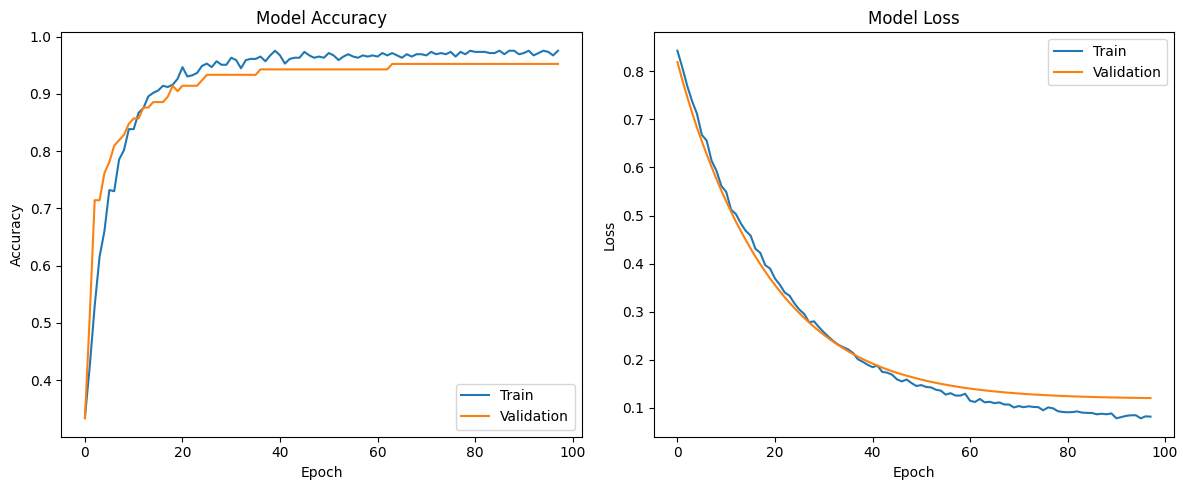

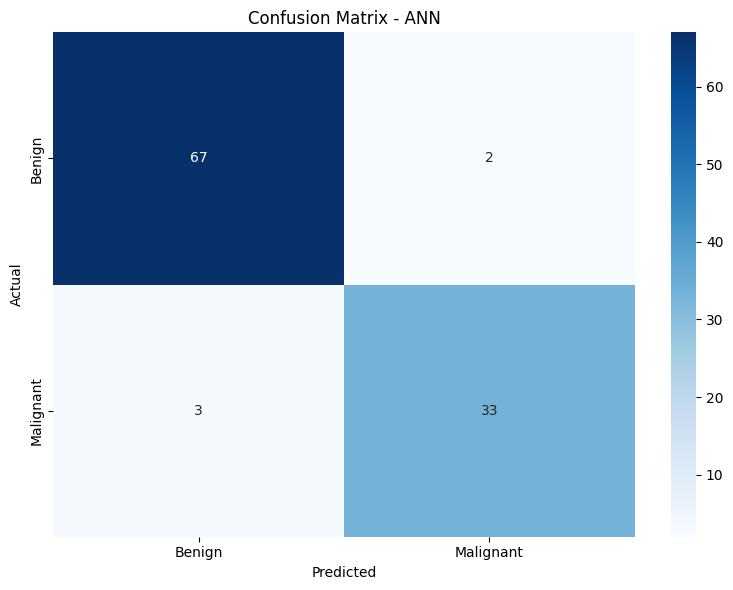

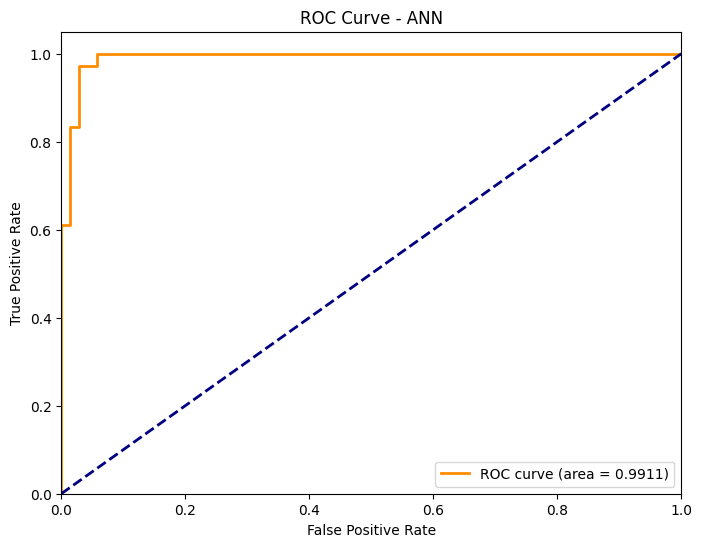


ANN Performance Metrics:
Accuracy: 0.9524
Precision: 0.9429
Recall: 0.9167
F1 Score: 0.9296
AUC: 0.9911

Classification Report for ANN:
              precision    recall  f1-score   support

      Benign       0.96      0.97      0.96        69
   Malignant       0.94      0.92      0.93        36

    accuracy                           0.95       105
   macro avg       0.95      0.94      0.95       105
weighted avg       0.95      0.95      0.95       105



In [21]:
def visualize_ann_results(history, metrics):
    """
    Visualize ANN training history and performance metrics.

    Args:
        history: Training history from model.fit()
        metrics: Dictionary of evaluation metrics
    """
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 5))

    # Training history plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    # Training loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.savefig('ann_training_history.png')
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
               xticklabels=['Benign', 'Malignant'],
               yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - ANN')
    plt.tight_layout()
    plt.savefig('ann_confusion_matrix.png')
    plt.show()

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(metrics['fpr'], metrics['tpr'], color='darkorange', lw=2,
             label=f'ROC curve (area = {metrics["auc"]:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ANN')
    plt.legend(loc="lower right")
    plt.savefig('ann_roc_curve.png')
    plt.show()

    # Print metrics
    print("\nANN Performance Metrics:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"AUC: {metrics['auc']:.4f}")

# CALL FUNCTION
visualize_ann_results(ann_history, ann_metrics)

# Print classification report
print("\nClassification Report for ANN:")
print(classification_report(y_test, ann_predictions, target_names=['Benign', 'Malignant']))


## **Train and Optimize Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def train_optimize_decision_tree(X_train, y_train):
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 7, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2'],
        'class_weight': [None, 'balanced']
    }

    dt = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5,
                               scoring='accuracy', n_jobs=-1, verbose=1, return_train_score=True)
    grid_search.fit(X_train, y_train)
    best_dt = grid_search.best_estimator_
    return best_dt, grid_search

# Call Function
best_dt, grid_results = train_optimize_decision_tree(X_train_scaled, y_train)

# Print best params and score
print("✅ Best Parameters:")
print(grid_results.best_params_)

print(f"✅ Best CV Accuracy: {grid_results.best_score_:.4f}")

# Print model structure
print("✅ Final Trained Decision Tree:")
print(best_dt)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
✅ Best Parameters:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
✅ Best CV Accuracy: 0.9652
✅ Final Trained Decision Tree:
DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       max_features='sqrt', random_state=42)


## **Evaluate Decision Tree Performance**

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

def evaluate_decision_tree(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'specificity': tn / (tn + fp),
        'npv': tn / (tn + fn) if (tn + fn) > 0 else 0,
        'roc_auc': auc(*roc_curve(y_test, y_prob)[:2]), # ← AUC = SCORE (a single number)
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'fpr': roc_curve(y_test, y_prob)[0],   # ← FPR values for ROC plot
        'tpr': roc_curve(y_test, y_prob)[1]    # ← TPR values for ROC plot
    }
    return metrics

# Call Function and display results
dt_metrics = evaluate_decision_tree(best_dt, X_test_scaled, y_test)

# Print metrics
for key, value in dt_metrics.items():
    if isinstance(value, (float, int)):
        print(f"{key.capitalize()}: {value:.4f}")


Accuracy: 0.9143
Precision: 0.8140
Recall: 0.9722
F1: 0.8861
Specificity: 0.8841
Npv: 0.9839
Roc_auc: 0.9672


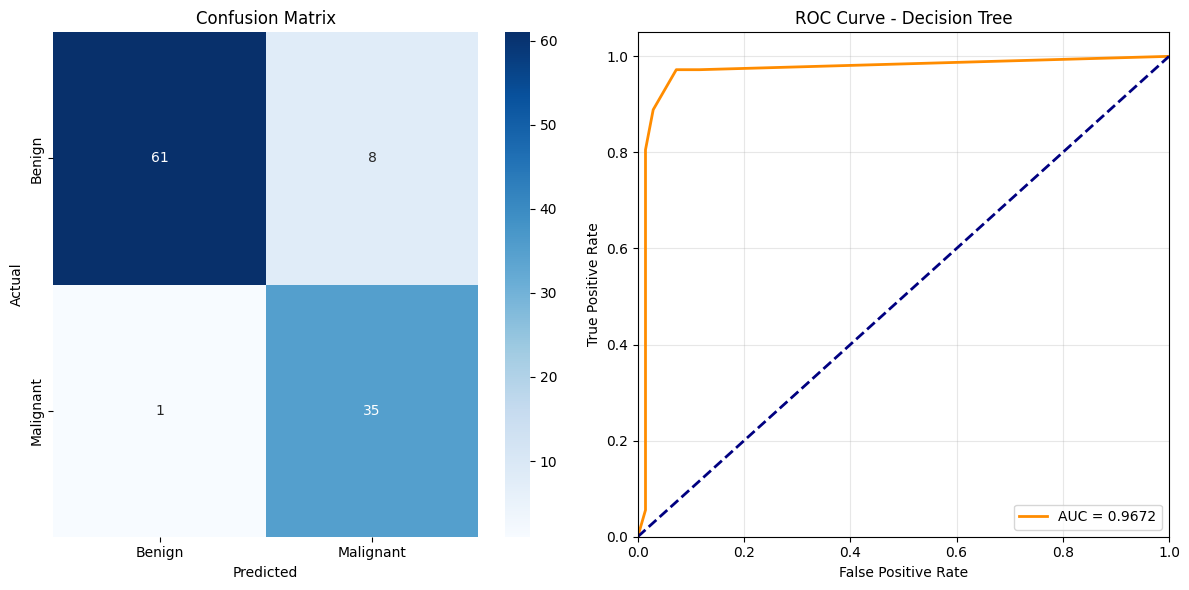

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dt_metrics(metrics):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
    model_name="Decision Tree"
    plt.subplot(1, 2, 2)
    plt.plot(metrics['fpr'], metrics['tpr'], color='darkorange',
             lw=2, label=f'AUC = {metrics["roc_auc"]:.4f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()

# Call Function
plot_dt_metrics(dt_metrics)

## **Analyze Feature Importance**

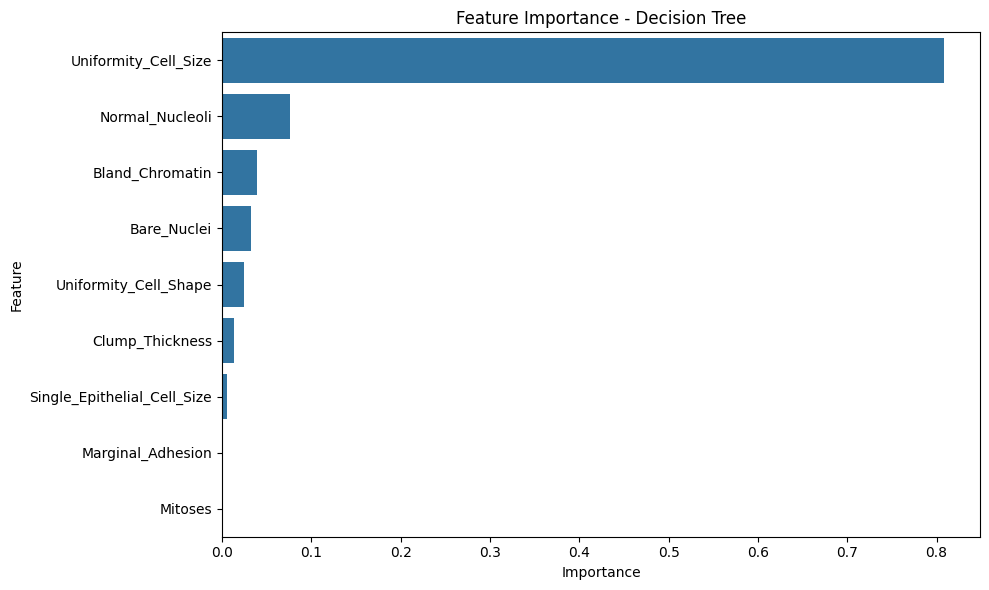


📋 Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.88      0.93        69
   Malignant       0.81      0.97      0.89        36

    accuracy                           0.91       105
   macro avg       0.90      0.93      0.91       105
weighted avg       0.93      0.91      0.92       105



In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_feature_importance(model, data):
    """
    Extract and visualize feature importance using the trained Decision Tree model.

    Args:
        model: Trained DecisionTreeClassifier
        data: Preprocessed DataFrame including features and 'Class' column

    Returns:
        DataFrame showing features ranked by importance
    """
    # Get feature names from data (excluding 'Class')
    feature_names = data.drop(columns='Class').columns.tolist()

    # Extract feature importances from the model
    importance = model.feature_importances_

    # Create DataFrame
    data_importance = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data_importance, x="Importance", y="Feature")
    plt.title("Feature Importance - Decision Tree")
    plt.tight_layout()
    plt.show()

    return data_importance


dt_feature_importance = get_feature_importance(best_dt, data)

print("\n📋 Classification Report:")
print(classification_report(y_test, best_dt.predict(X_test_scaled), target_names=['Benign', 'Malignant']))

## **Train and Optimize SVM**

In [26]:
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV, StratifiedKFold
    import pandas as pd
    import os
    import time
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

In [27]:
# --- Function to train and optimize SVM ---
def train_optimize_svm(X_train, y_train):
    """
    Trains an SVM classifier using GridSearchCV to find the best hyperparameters.

    Args:
        X_train: Scaled training feature set
        y_train: Training labels

    Returns:
        best_svm: Best trained SVM model
        training_time: Time taken for training
        optimization_results: DataFrame with all hyperparameter search results
    """
    # Define hyperparameter search space
    param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000, 5000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.0001, 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4, 5],
    'class_weight': [None, 'balanced']
    }

    svm = SVC(random_state=42, probability=True)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=svm,
        param_grid=param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )

    start_time = time.time()
    grid_search.fit(X_train, y_train)
    training_time = time.time() - start_time

    best_svm = grid_search.best_estimator_

    # Save all optimization results
    optimization_results = pd.DataFrame(grid_search.cv_results_)
    optimization_results = optimization_results[['params', 'mean_test_score', 'std_test_score',
                                                  'mean_train_score', 'std_train_score', 'rank_test_score']]
    optimization_results = optimization_results.sort_values('rank_test_score')

    os.makedirs('results', exist_ok=True)
    optimization_results.to_csv('results/svm_optimization_results.csv', index=False)

    return best_svm, training_time, optimization_results

# Call the train_optimize_svm function
best_svm, training_time, optimization_results = train_optimize_svm(X_train_scaled, y_train)

print(best_svm)
print(f"Training time: {training_time:.2f} seconds")
display(optimization_results.head())

Fitting 5 folds for each of 1568 candidates, totalling 7840 fits
SVC(C=0.1, degree=2, gamma=1, kernel='sigmoid', probability=True,
    random_state=42)
Training time: 159.70 seconds


,params,mean_test_score,std_test_score,mean_train_score,std_train_score,rank_test_score
363,"{'C': 0.1, 'class_weight': 'balanced', 'degree...",0.977509,0.007625,0.973415,0.003473,1
447,"{'C': 0.1, 'class_weight': 'balanced', 'degree...",0.977509,0.007625,0.973415,0.003473,1
335,"{'C': 0.1, 'class_weight': None, 'degree': 5, ...",0.977509,0.007625,0.972903,0.004160,1
251,"{'C': 0.1, 'class_weight': None, 'degree': 2, ...",0.977509,0.007625,0.972903,0.004160,1
307,"{'C': 0.1, 'class_weight': None, 'degree': 4, ...",0.977509,0.007625,0.972903,0.004160,1


## **Evaluate the Trained SVM**

In [28]:

def evaluate_svm(model, X_test, y_test):
    """
    Evaluates the performance of the trained SVM model on the test set.

    Args:
        model: Trained SVM classifier
        X_test: Scaled test feature set
        y_test: True labels for the test set

    Returns:
        metrics: Dictionary containing evaluation metrics
    """
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score,
        f1_score, confusion_matrix, roc_curve, auc
    )
    # Measure inference time
    start_inference = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_inference

    y_prob = model.predict_proba(X_test)[:, 1]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'specificity': tn / (tn + fp) if (tn + fp) > 0 else 0,
        'npv': tn / (tn + fn) if (tn + fn) > 0 else 0,
        'roc_auc': auc(*roc_curve(y_test, y_prob)[:2]),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'fpr': roc_curve(y_test, y_prob)[0],
        'tpr': roc_curve(y_test, y_prob)[1],
        'inference_time': inference_time
    }

    return metrics

# --- Call the evaluate_svm function ---
svm_metrics = evaluate_svm(best_svm, X_test_scaled, y_test)

print("\n SVM Model Performance Metrics:\n")
# Corrected indentation: for loop is now aligned with the print statement
for key, value in svm_metrics.items(): # Changed metrics to svm_metrics
    if isinstance(value, (float, int)) and key not in ['fpr', 'tpr']:
        print(f"{key.capitalize():<15}: {value:.4f}")


 SVM Model Performance Metrics:

Accuracy       : 0.9619
Precision      : 0.9444
Recall         : 0.9444
F1             : 0.9444
Specificity    : 0.9710
Npv            : 0.9710
Roc_auc        : 0.9883
Inference_time : 0.0009


## **Visualize the SVM Results**

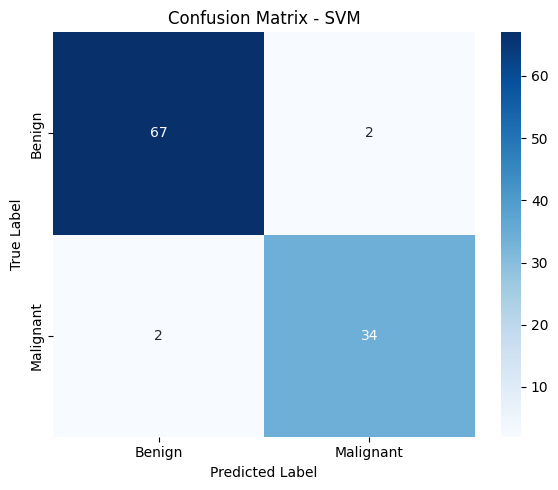

In [29]:
def plot_confusion_matrix(metrics, model_name="SVM"):
    """
    Plots a clean Confusion Matrix for a model.

    Args:
        metrics: Dictionary containing 'confusion_matrix'
        model_name: Name of the model (for title)
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    os.makedirs('plots', exist_ok=True)

    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig(f'plots/confusion_matrix_{model_name.lower()}.png', dpi=300)
    plt.show()

# --- Call it for your SVM model ---
plot_confusion_matrix(svm_metrics, model_name="SVM")


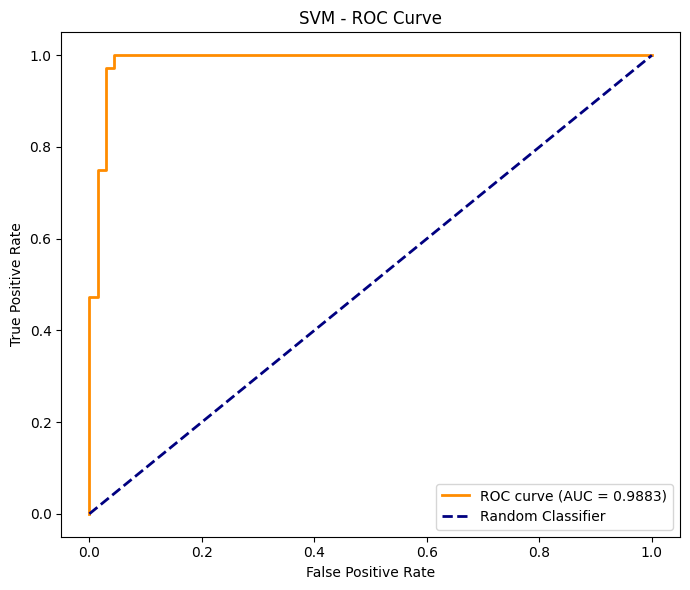

In [30]:
def plot_roc_curve(metrics, model_name="SVM"):
    """
    Plots a clean ROC curve for a model.

    Args:
        metrics: Dictionary containing 'fpr', 'tpr', and 'roc_auc'
        model_name: Name of the model (for title)
    """
    import matplotlib.pyplot as plt
    import os

    os.makedirs('plots', exist_ok=True)

    plt.figure(figsize=(7, 6))
    plt.plot(metrics['fpr'], metrics['tpr'], color='darkorange', lw=2,
             label=f'ROC curve (AUC = {metrics["roc_auc"]:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig(f'plots/roc_curve_{model_name.lower()}.png', dpi=300)
    plt.show()

# --- Call it for your SVM model ---
plot_roc_curve(svm_metrics, model_name="SVM")


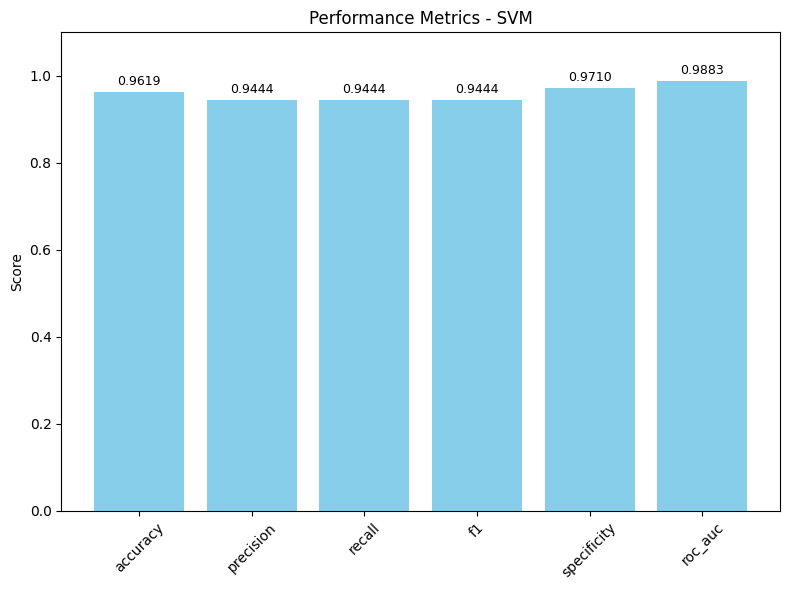

In [31]:
def plot_performance_metrics(metrics, model_name="SVM"):
    """
    Plots a bar chart for key performance metrics of the model.

    Args:
        metrics: Dictionary containing evaluation metrics
        model_name: Name of the model (for title and filename)
    """
    import matplotlib.pyplot as plt
    import os

    os.makedirs('plots', exist_ok=True)

    # Select metrics to plot
    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'specificity', 'roc_auc']
    values = [metrics[m] for m in metrics_to_plot]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(metrics_to_plot, values, color='skyblue')

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.4f}', ha='center', va='bottom', fontsize=9)

    plt.ylim(0, 1.1)  # Set y-axis limit a bit higher for label space
    plt.title(f'Performance Metrics - {model_name}')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'plots/performance_metrics_{model_name.lower()}.png', dpi=300)
    plt.show()
# --- Call it for your SVM model ---
plot_performance_metrics(svm_metrics, model_name="SVM")


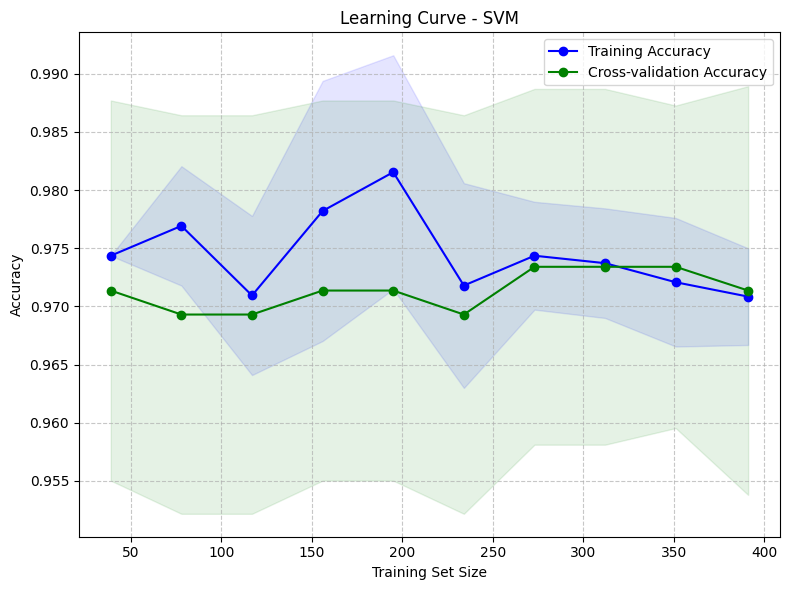

In [32]:
def plot_learning_curve(model, X_train, y_train, model_name="SVM"):
    """
    Plots the learning curve showing training and cross-validation accuracy
    as the training set size increases.

    Args:
        X_train: Scaled training feature set
        y_train: Training labels
        model_name: Name of the model (for title and filename)
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.model_selection import learning_curve
    import os

    os.makedirs('plots', exist_ok=True)

    # Define training sizes (10% to 100%)
    train_sizes = np.linspace(0.1, 1.0, 10)

    # Get learning curve results
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train,
        train_sizes=train_sizes,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    # Calculate mean and std for plotting
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation Accuracy')

    # Error bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

    plt.title(f'Learning Curve - {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'plots/learning_curve_{model_name.lower()}.png', dpi=300)
    plt.show()
# --- Call it for your SVM model ---
plot_learning_curve(best_svm, X_train_scaled, y_train, model_name="SVM")


In [33]:
import ipywidgets as widgets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define sliders
C_slider = widgets.FloatLogSlider(value=1, base=10, min=-2, max=3, step=0.1, description='C:')
gamma_slider = widgets.SelectionSlider(options=['scale', 'auto', 0.001, 0.01, 0.1, 1], description='Gamma:')

display(C_slider, gamma_slider)

# Function to train SVM
def train_svm(C, gamma):
    model = SVC(C=C, gamma=gamma, probability=True, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)

    # Plotting
    plt.figure(figsize=(5,3))
    plt.bar(["Validation Accuracy"], [acc], color="skyblue")
    plt.title(f"Validation Accuracy: {acc:.4f}")
    plt.ylim(0, 1)
    plt.show()

    return acc

# Create interactive output
output_svm = widgets.interactive_output(
    train_svm,
    {'C': C_slider,
     'gamma': gamma_slider}
)

display(output_svm)


FloatLogSlider(value=1.0, description='C:', max=3.0, min=-2.0)

SelectionSlider(description='Gamma:', options=('scale', 'auto', 0.001, 0.01, 0.1, 1), value='scale')

Output()

In [34]:
import ipywidgets as widgets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define sliders
max_depth_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='Max Depth:')
min_samples_split_slider = widgets.IntSlider(value=2, min=2, max=20, step=1, description='Min Split:')
min_samples_leaf_slider = widgets.IntSlider(value=1, min=1, max=20, step=1, description='Min Leaf:')

display(max_depth_slider, min_samples_split_slider, min_samples_leaf_slider)

# Variables to track best performance
best_accuracy = 0
best_hyperparams = {}

# Define training function
def train_decision_tree(max_depth, min_samples_split, min_samples_leaf):
    global best_accuracy, best_hyperparams

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)

    # Update if better
    if acc > best_accuracy:
        best_accuracy = acc
        best_hyperparams = {
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf
        }
        print(f" New Best Accuracy: {best_accuracy:.4f}")
        print(f" Best Parameters: {best_hyperparams}")

    # Plot current model performance
    plt.figure(figsize=(5,3))
    plt.bar(["Validation Accuracy"], [acc], color="lightgreen")
    plt.title(f"Current Accuracy: {acc:.4f}")
    plt.ylim(0, 1)
    plt.show()

# Interactive output
output_dt = widgets.interactive_output(
    train_decision_tree,
    {'max_depth': max_depth_slider,
     'min_samples_split': min_samples_split_slider,
     'min_samples_leaf': min_samples_leaf_slider}
)

display(output_dt)


IntSlider(value=5, description='Max Depth:', max=20, min=1)

IntSlider(value=2, description='Min Split:', max=20, min=2)

IntSlider(value=1, description='Min Leaf:', max=20, min=1)

Output()

In [35]:
import ipywidgets as widgets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define sliders
C_slider = widgets.FloatLogSlider(
    value=1, base=10, min=-2, max=3, step=0.1, description='C (Regularization):', continuous_update=False
)
gamma_slider = widgets.FloatLogSlider(
    value=0.01, base=10, min=-4, max=1, step=0.1, description='Gamma:', continuous_update=False
)
kernel_dropdown = widgets.Dropdown(
    options=['linear', 'rbf', 'poly', 'sigmoid'],
    value='rbf',
    description='Kernel:'
)

display(C_slider, gamma_slider, kernel_dropdown)

# Variables to track best performance
best_accuracy_svm = 0
best_hyperparams_svm = {}

# Define training function
def train_svm(C, gamma, kernel):
    global best_accuracy_svm, best_hyperparams_svm

    # Train SVM
    model = SVC(C=C, gamma=gamma, kernel=kernel, probability=True, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)

    # Update best if needed
    if acc > best_accuracy_svm:
        best_accuracy_svm = acc
        best_hyperparams_svm = {
            'C': C,
            'gamma': gamma,
            'kernel': kernel
        }
        print(f" New Best Accuracy: {best_accuracy_svm:.4f}")
        print(f" Best Parameters: {best_hyperparams_svm}")

    # Plot current model performance
    plt.figure(figsize=(5, 3))
    plt.bar(["Validation Accuracy"], [acc], color="skyblue")
    plt.title(f"Current Accuracy: {acc:.4f}")
    plt.ylim(0, 1)
    plt.show()

# Interactive output
output_svm = widgets.interactive_output(
    train_svm,
    {'C': C_slider, 'gamma': gamma_slider, 'kernel': kernel_dropdown}
)

display(output_svm)


FloatLogSlider(value=1.0, continuous_update=False, description='C (Regularization):', max=3.0, min=-2.0)

FloatLogSlider(value=0.01, continuous_update=False, description='Gamma:', max=1.0, min=-4.0)

Dropdown(description='Kernel:', index=1, options=('linear', 'rbf', 'poly', 'sigmoid'), value='rbf')

Output()

In [36]:
import ipywidgets as widgets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib
import os

# Define sliders
learning_rate_slider = widgets.FloatLogSlider(
    value=0.001, base=10, min=-4, max=-1, step=0.1,
    description='Learning Rate:', continuous_update=False
)
dropout_slider = widgets.FloatSlider(
    value=0.3, min=0.0, max=0.7, step=0.05,
    description='Dropout Rate:', continuous_update=False
)
hidden_units_slider = widgets.IntSlider(
    value=64, min=16, max=256, step=16,
    description='Hidden Units:', continuous_update=False
)

display(learning_rate_slider, dropout_slider, hidden_units_slider)

# Variables to track best performance
best_accuracy_ann = 0
best_hyperparams_ann = {}
best_model_ann = None

# Folder to save best model
os.makedirs('models', exist_ok=True)

# Define training function
def train_ann(lr, dropout, hidden_units):
    global best_accuracy_ann, best_hyperparams_ann, best_model_ann

    # Build ANN
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train on Training set and Validate on Validation set
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=50,
        batch_size=32,
        verbose=0
    )

    val_acc = max(history.history['val_accuracy'])  # Take best val accuracy

    # Update best if needed
    if val_acc > best_accuracy_ann:
        best_accuracy_ann = val_acc
        best_hyperparams_ann = {
            'learning_rate': lr,
            'dropout': dropout,
            'hidden_units': hidden_units
        }
        best_model_ann = model

        print(f" New Best Validation Accuracy: {best_accuracy_ann:.4f}")
        print(f" Best Hyperparameters: {best_hyperparams_ann}")

        # use the native Keras format
        model.save('models/best_ann_model.keras')


    # Plot training and validation loss curves
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Training/Validation Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive output
output_ann = widgets.interactive_output(
    train_ann,
    {'lr': learning_rate_slider, 'dropout': dropout_slider, 'hidden_units': hidden_units_slider}
)

display(output_ann)


FloatLogSlider(value=0.001, continuous_update=False, description='Learning Rate:', max=-1.0, min=-4.0)

FloatSlider(value=0.3, continuous_update=False, description='Dropout Rate:', max=0.7, step=0.05)

IntSlider(value=64, continuous_update=False, description='Hidden Units:', max=256, min=16, step=16)

Output()